In [1]:
import os
import tensorflow as tf 
from tensorflow.keras.layers import *
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

plt.style.use('seaborn')

C:\Users\leeky\AppData\Local\Temp\ipykernel_24124\2419346892.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [4]:
train_dir = "C:\\Users\\leeky\\Desktop\\tomato\\train"
test_dir = "C:\\Users\\leeky\\Desktop\\tomato\\test"

In [5]:
train_weather_fnames = os.listdir(train_dir)
train_weather_fnames

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']

In [6]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    horizontal_flip = True,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(
    rescale = 1./255,
)

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(150,150), batch_size=16, class_mode='categorical', shuffle=True, subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(150,150), batch_size=16, class_mode='categorical', shuffle=True, subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(150,150), batch_size=16, class_mode='categorical', shuffle=False
)

Found 8000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [8]:
img = train_generator[0]
print(img[0].shape)
print(img[1].shape)

(16, 150, 150, 3)
(16, 10)


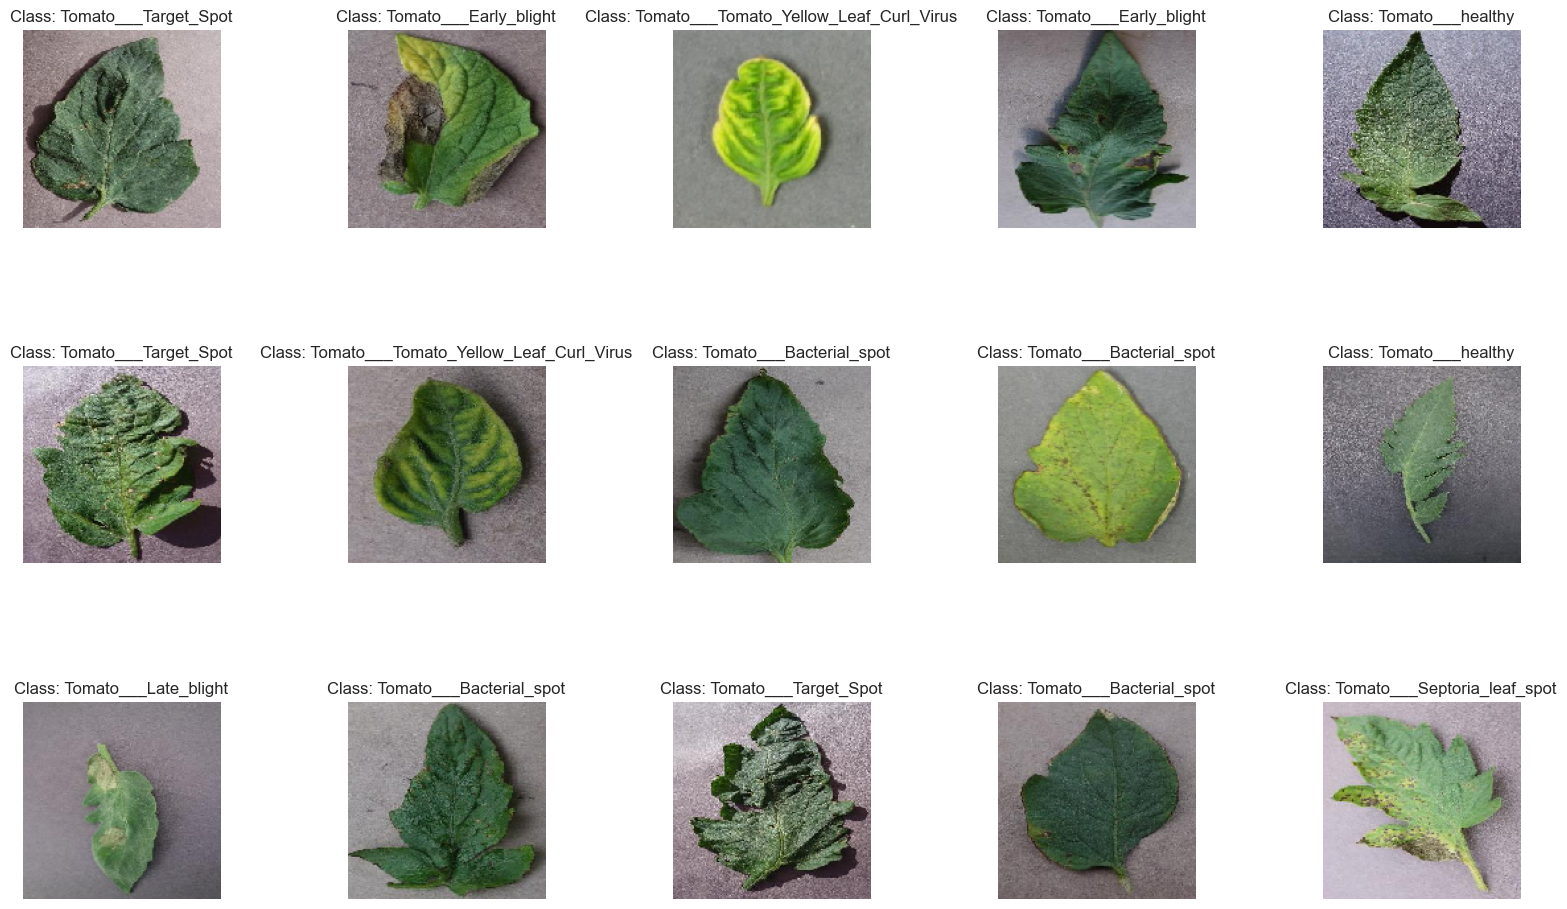

In [11]:
labels = [k for k in train_generator.class_indices]
sample_generate = train_generator.__next__()

images = sample_generate[0]
titles = sample_generate[1]

plt.figure(figsize = (20 ,20))

for i in range(15):
    plt.subplot(5 , 5, i+1)
    plt.subplots_adjust(hspace = 0.7, wspace = 0.3)
    plt.imshow(images[i])
    plt.title(f'Class: {labels[np.argmax(titles[i],axis=0)]}')
    plt.axis("off")

In [15]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# 32개 필터, 크기3커널, 패딩 및 스트라이드 기본

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# 64개 필터, 크기3커널, 패딩 및 스트라이드 기본


model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# 128개 필터, 크기3커널, 패딩 및 스트라이드 기본

model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# 256개 필터, 크기3커널, 패딩 및 스트라이드 기본

# 완전연결 신경망
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 batch_normalization_5 (Batc  (None, 150, 150, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 75, 75, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 batch_normalization_6 (Batc  (None, 75, 75, 64)      

In [16]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [17]:
history1 = model.fit(train_generator,
          steps_per_epoch=train_generator.samples // train_generator.batch_size,
          validation_data=validation_generator, 
          validation_steps=validation_generator.samples // validation_generator.batch_size,
          epochs=30)

500/500 [==============================] - 104s 205ms/step - loss: 1.7399 - acc: 0.4293 - val_loss: 6.0747 - val_acc: 0.1335
Epoch 2/30
500/500 [==============================] - 30s 59ms/step - loss: 1.1907 - acc: 0.5931 - val_loss: 0.9748 - val_acc: 0.6895
Epoch 3/30
500/500 [==============================] - 31s 61ms/step - loss: 0.9630 - acc: 0.6862 - val_loss: 0.9431 - val_acc: 0.7105
Epoch 4/30
500/500 [==============================] - 30s 59ms/step - loss: 0.7871 - acc: 0.7470 - val_loss: 3.0936 - val_acc: 0.3605
Epoch 5/30
500/500 [==============================] - 30s 59ms/step - loss: 0.7101 - acc: 0.7697 - val_loss: 0.7532 - val_acc: 0.7740
Epoch 6/30
500/500 [==============================] - 30s 59ms/step - loss: 0.6415 - acc: 0.7944 - val_loss: 5.0717 - val_acc: 0.4145
Epoch 7/30
500/500 [==============================] - 31s 61ms/step - loss: 0.5675 - acc: 0.8195 - val_loss: 5.1367 - val_acc: 0.3350
Epoch 8/30
500/500 [==============================] - 29s 59ms/step - l

In [23]:
loss, accuracy = model.evaluate(test_generator)
print(f'test accuracy is {accuracy*100}%')

63/63 [==============================] - 1s 14ms/step - loss: 1.1745 - acc: 0.7940
test accuracy is 79.40000295639038%


### VGG16 미세조정 후 모델 훈련

In [24]:
##VGG16 fine tuning

from keras.applications import VGG16 
from tensorflow.keras import Model

vgg_model = VGG16(
    weights='imagenet', include_top=False, input_shape=(150, 150, 3)
)

In [25]:
# Freeze four convolution blocks
for layer in vgg_model.layers[:15]:
    layer.trainable = False
# Make sure you have frozen the correct layers
for i, layer in enumerate(vgg_model.layers):
    print(i, layer.name, layer.trainable)

0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True


In [26]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [27]:
x = vgg_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dense(10, activation='softmax')(x)
transfer_model = Model(inputs=vgg_model.input, outputs=x)

In [28]:
transfer_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [29]:
transfer_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [30]:
history2 = model.fit(train_generator,
          steps_per_epoch=train_generator.samples // train_generator.batch_size,
          validation_data=validation_generator, 
          validation_steps=validation_generator.samples // validation_generator.batch_size,
          epochs=30)

Epoch 1/30
500/500 [==============================] - 30s 59ms/step - loss: 0.1692 - acc: 0.9530 - val_loss: 0.7627 - val_acc: 0.8305
Epoch 2/30
500/500 [==============================] - 31s 61ms/step - loss: 0.1594 - acc: 0.9539 - val_loss: 0.6093 - val_acc: 0.8665
Epoch 3/30
500/500 [==============================] - 30s 60ms/step - loss: 0.1661 - acc: 0.9544 - val_loss: 0.4348 - val_acc: 0.8950
Epoch 4/30
500/500 [==============================] - 31s 61ms/step - loss: 0.1352 - acc: 0.9619 - val_loss: 2.4820 - val_acc: 0.7480
Epoch 5/30
500/500 [==============================] - 30s 61ms/step - loss: 0.1279 - acc: 0.9613 - val_loss: 0.6316 - val_acc: 0.8725
Epoch 6/30
500/500 [==============================] - 30s 60ms/step - loss: 0.1294 - acc: 0.9645 - val_loss: 1.5955 - val_acc: 0.7785
Epoch 7/30
500/500 [==============================] - 30s 59ms/step - loss: 0.1580 - acc: 0.9579 - val_loss: 0.7701 - val_acc: 0.8505
Epoch 8/30
500/500 [==============================] - 30s 60ms

In [31]:
loss, accuracy = model.evaluate(test_generator)
print(f'test accuracy is {accuracy*100}%')

63/63 [==============================] - 1s 16ms/step - loss: 0.3961 - acc: 0.9270
test accuracy is 92.69999861717224%
